In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# df = pd.read_csv("/content/gdrive/My Drive/tweetsConvereted2017_toxicPerspectiveScore.csv")
df = pd.read_csv("/content/gdrive/My Drive/tweets.csv")

In [4]:
df['NewDateFormat'] = pd.to_datetime(df['tweet_creation'], unit='s')

In [5]:
df = df[(df['tweet_creation']>1483228799) & (df['tweet_creation']<=1514764799)]

In [6]:
# df["month"] = df["NewDateFormat"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").strftime("%m"))
df['month'] = df['NewDateFormat'].dt.month

In [7]:
df.head()

,user_id,screen_name,tweet_id,tweet_text,tweet_creation,tweet_fav,tweet_rt,rp_flag,rp_status,rp_user,...,qt_rt,rt_flag,rt_status_id,rt_user_id,rt_text,rt_creation,rt_fav,rt_rt,NewDateFormat,month
0,850859913244852224,NationalismXXI,919445178859053056,Women https://t.co/quXcjOq9na,1.508055e+09,0.0,0.0,False,NaN,NaN,...,148.0,False,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-15 08:09:47,10
1,850859913244852224,NationalismXXI,919441926021107712,Superjew https://t.co/cba5laEfKG,1.508054e+09,0.0,0.0,False,NaN,NaN,...,302.0,False,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-15 07:56:52,10
2,850859913244852224,NationalismXXI,919367819694927872,NaN,1.508037e+09,0.0,777.0,False,NaN,NaN,...,NaN,True,9.144992e+17,2.583248e+08,You want a quote to go viral? Retweet this one...,1.506879e+09,704.0,777.0,2017-10-15 03:02:23,10
3,850859913244852224,NationalismXXI,919366633512226816,NaN,1.508040e+09,0.0,63.0,False,NaN,NaN,...,NaN,True,9.189423e+17,1.289955e+09,@CNN So when are u going to publish a jihadi s...,1.507939e+09,181.0,63.0,2017-10-15 03:57:41,10
4,850859913244852224,NationalismXXI,919365144697860096,NaN,1.508040e+09,0.0,105.0,False,NaN,NaN,...,NaN,True,9.193076e+17,8.504084e+17,Fash the Nation Episode 92: Immoral High Groun...,1.508026e+09,212.0,105.0,2017-10-15 03:51:46,10


In [16]:
groupDf = df[['user_id',  'qt_flag', 'rt_flag','month']]

In [20]:
mask_original = (groupDf['qt_flag'] == False) & (groupDf['rt_flag'] == False)
mask_retweet = (groupDf['qt_flag'] == False) & (groupDf['rt_flag'] == True)
mask_quoted = (groupDf['qt_flag'] == True) & (groupDf['rt_flag'] == False)

In [21]:
def determine_category(original_count, retweet_count, quoted_count):
    if original_count == (original_count + retweet_count + quoted_count):
        return 'original'
    elif retweet_count == (original_count + retweet_count + quoted_count):
        return 'retweet'
    elif quoted_count == (original_count + retweet_count + quoted_count):
        return 'quoted'
    elif (original_count > 0) and (retweet_count > 0) and (quoted_count == 0):
        return 'original and retweet'
    elif (original_count > 0) and (quoted_count > 0) and (retweet_count == 0):
        return 'original and quoted'
    elif (quoted_count > 0) and (retweet_count > 0) and (original_count == 0):
        return 'quoted and retweet'
    elif (original_count > 0) and (quoted_count > 0) and (retweet_count > 0):
        return 'original, quoted and retweet'

In [24]:
'''
This code performs the following operations:
- Groups the "groupDf" dataframe by the 'user_id' and 'month' columns.
- Counts the number of rows in each group using the "size()" function.
- Resets the index of the resulting dataframe to a default integer index using the "reset_index()" function.
- Renames the resulting single column from the count operation to "tweets_count" using the "name" argument of the "reset_index()" function.
The final result is a dataframe with two columns 'user_id' and 'month' and a third column 'tweets_count' that holds the count of tweets for each user in each month.
'''

df_grouped = groupDf.groupby(['user_id', 'month']).size().reset_index(name='tweets_count')

In [25]:
# This code is creating a new dataframe original_counts by grouping the original tweets in the groupDf dataframe by 'user_id' and 'month' and counting the number of tweets in each group. The resulting count of original tweets is stored in a new column called 'original_count'. The mask_original is a boolean mask that is used to select only the original tweets from groupDf for grouping and counting.
original_counts = groupDf[mask_original].groupby(['user_id', 'month']).size().reset_index(name='original_count')
retweet_counts = groupDf[mask_retweet].groupby(['user_id', 'month']).size().reset_index(name='retweet_count')
quoted_counts = groupDf[mask_quoted].groupby(['user_id', 'month']).size().reset_index(name='quoted_count')

In [29]:
# This code is performing a left join operation between the "df_grouped" dataframe and the "original_counts" dataframe. The join is being done on the columns "user_id" and "month" between both dataframes. The argument "how='left'" specifies that this is a left join, meaning that only the rows from the "df_grouped" dataframe will be kept and the missing values in the "original_count" column of the joined dataframe will be filled with the value 0, which is specified by the ".fillna(0)" method. The result of the join will be a new dataframe that contains all the columns from both the "df_grouped" and "original_counts" dataframes.
df_grouped = df_grouped.merge(original_counts, on=['user_id', 'month'], how='left').fillna(0)
df_grouped = df_grouped.merge(retweet_counts, on=['user_id', 'month'], how='left').fillna(0)
df_grouped = df_grouped.merge(quoted_counts, on=['user_id', 'month'], how='left').fillna(0)

In [30]:
df_grouped['category'] = df_grouped.apply(lambda x: determine_category(x['original_count'], x['retweet_count'], x['quoted_count']), axis=1)

In [32]:
df_pivot = df_grouped.pivot_table(index='month', columns='category', values='user_id', aggfunc='nunique').reset_index()

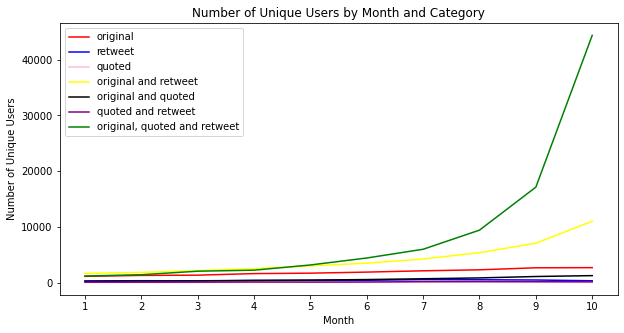

In [41]:
plt.figure(figsize=(10,5))
plt.xlabel('Month')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users by Month and Category')

plt.plot(df_pivot['month'], df_pivot['original'], label='original', color='red')
plt.plot(df_pivot['month'], df_pivot['retweet'], label='retweet', color='blue')
plt.plot(df_pivot['month'], df_pivot['quoted'], label='quoted', color='pink')
plt.plot(df_pivot['month'], df_pivot['original and retweet'], label='original and retweet', color='yellow')
plt.plot(df_pivot['month'], df_pivot['original and quoted'], label='original and quoted', color='black')
plt.plot(df_pivot['month'], df_pivot['quoted and retweet'], label='quoted and retweet', color='purple')
plt.plot(df_pivot['month'], df_pivot['original, quoted and retweet'], label='original, quoted and retweet', color='green')

# plt.yticks(np.arange(min(df_pivot['original']), max(df_pivot['original']), step=1))
plt.xticks(df_pivot['month'], range(1, 11))
plt.legend()
plt.show()

In [26]:
# unique_values = groupDf['month'].unique()
# unique_values.sort()
# monthDf = groupDf[groupDf['month'] == "01"]
# originalDf = monthDf[(monthDf['qt_flag'] == True) & (monthDf['rt_flag'] == False)]
# originalDf['Toxicity'] = originalDf['Toxicity'] * 10
# originalDf['Toxicity'] = (originalDf['Toxicity'].apply(np.ceil)) / 10
# original_unique_values = originalDf['Toxicity'].unique()
# original_unique_values.sort()
# def countUsers(input):
#     tempDf = originalDf[originalDf['Toxicity'] == input]
#     return tempDf['user_id'].nunique()
# for i in original_unique_values:
#     print(countUsers(i))

In [27]:
'''
I have a dataframe with the following columns. 
groupDf = df[['user_id', 'Toxicity',  'qt_flag', 'rt_flag','month']]

The qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and Flase. The rt_flag says whether the tweet is a retweet or not. The values of the column are True and Flase. 

I am categorizing the tweets in 3 categories. 
1) original
2) retweet
3) quoted tweet

A tweet is original if qt_flag = False and rt_flag = False
A tweet is retweet if qt_flag = False and rt_flag = True
A tweet is quoted tweet if qt_flag = True and rt_flag = False

A user has multiple tweets in my dataset, each user will have done different types of tweets. For each month, I want to count how many users have only
1) original tweets - i.e all the tweets done by the user will only be original
2) retweets - i.e all the tweets done by the user will only be quoted.
3) quoted - i.e all the tweets done by the user will only be quoted. 
4) original and retweet - i.e all the tweets done by the user will only be of the type original and retweet
5) original and quoted - i.e all the tweets done by the user will only be of the type original and quoted.
6) quoted and retweet - i.e all the tweets done by the user will only be of the type quoted and retweet
7) original, quoted and retweet - i.e. i.e all the tweets done by the user will only be of the type original and retweet

For example, if 
user 1 has 10 tweets and out of which, 2 tweets are quoted and 8 tweets are original, then the user would go into the category of 'original and quoted'
if user 2 has 7 tweets out of which 3 are retweet and 4 are quoted, then the user would go into the category of 'quoted and retweet'
if user 3 has 20 tweets out of which 10 tweets are original, 5 are retweet and 5 are quoted, then the user would go into the category of 'original, quoted and retweet'

so now this way, for all the 7 categories I would certain number of unique users for each month. 

I then want to plot this where
x axis - number of months
y axis - number of unique users

and there will be 7 different lines in the same plot of different colors representing the 7 different categories. 

'''

"\nI have a dataframe with the following columns. \ngroupDf = df[['user_id', 'Toxicity',  'qt_flag', 'rt_flag','month']]\n\nThe qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and Flase. The rt_flag says whether the tweet is a retweet or not. The values of the column are True and Flase. \n\nI am categorizing the tweets in 3 categories. \n1) original\n2) retweet\n3) quoted tweet\n\nA tweet is original if qt_flag = False and rt_flag = False\nA tweet is retweet if qt_flag = False and rt_flag = True\nA tweet is quoted tweet if qt_flag = True and rt_flag = False\n\nA user has multiple tweets in my dataset, each user will have done different types of tweets. For each month, I want to count how many users have only\n1) original tweets - i.e all the tweets done by the user will only be original\n2) retweets - i.e all the tweets done by the user will only be quoted.\n3) quoted - i.e all the tweets done by the user will only be quoted. \n4) original and

In [28]:
'''
I have a data frame in python pandas with the following columns. 
- 'user_id'
- 'qt_flag'
- 'rt_flag'
- 'month'

The qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and False. The rt_flag says whether the tweet is a retweet or not. The values of the column are True and False. 

I am categorizing the tweets in 3 categories. 
1) original
2) retweet
3) quoted tweet

A tweet is original if qt_flag = False and rt_flag = False
A tweet is retweet if qt_flag = False and rt_flag = True
A tweet is quoted tweet if qt_flag = True and rt_flag = False

A user has multiple tweets in my dataset, each user will have done different types of tweets. I want to count how many users have for each month. I am listing the categories below:
1) original tweets - i.e all the tweets done by the user will only be original
2) retweets - i.e all the tweets done by the user will only be quoted.
3) quoted - i.e all the tweets done by the user will only be quoted. 
4) original and retweet - i.e all the tweets done by the user will only be of the type original and retweet
5) original and quoted - i.e all the tweets done by the user will only be of the type original and quoted.
6) quoted and retweet - i.e all the tweets done by the user will only be of the type quoted and retweet
7) original, quoted and retweet - i.e. i.e all the tweets done by the user will only be of the type original and retweet

This is how I want the categorization to be. For example, if 
- user 1 has 10 tweets and out of which, 2 tweets are quoted and 8 tweets are original, then the user would go into the category of 'original and quoted'
- if user 2 has 7 tweets out of which 3 are retweet and 4 are quoted, then the user would go into the category of 'quoted and retweet'
- if user 3 has 20 tweets out of which 10 tweets are original, 5 are retweet and 5 are quoted, then the user would go into the category of 'original, quoted and retweet'
- if user 4 has 15 tweets out of which 10 retweets and 5 quoted tweets, then the user would go into the category of 'quoted and retweet'

so now this way, for all the 7 categories I would have certain number of unique users for each category for each month. i.e. each user will be present in one of the seven categories that I just listed above for each month. 

I then want to plot this where
x axis - number of months
y axis - number of unique users

and there will be 7 different lines in the same plot of different colors representing the 7 different categories. 

'''

"\nI have a data frame in python pandas with the following columns. \n- 'user_id'\n- 'qt_flag'\n- 'rt_flag'\n- 'month'\n\nThe qt_flag says whether the tweet is a quoted tweet or not. The values of the column are True and False. The rt_flag says whether the tweet is a retweet or not. The values of the column are True and False. \n\nI am categorizing the tweets in 3 categories. \n1) original\n2) retweet\n3) quoted tweet\n\nA tweet is original if qt_flag = False and rt_flag = False\nA tweet is retweet if qt_flag = False and rt_flag = True\nA tweet is quoted tweet if qt_flag = True and rt_flag = False\n\nA user has multiple tweets in my dataset, each user will have done different types of tweets. I want to count how many users have for each month. I am listing the categories below:\n1) original tweets - i.e all the tweets done by the user will only be original\n2) retweets - i.e all the tweets done by the user will only be quoted.\n3) quoted - i.e all the tweets done by the user will only 